In [3]:
#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              
import matplotlib.gridspec as gridspec


print("done importing modules")


done importing modules


In [74]:
#%% Define file locations
# ## SST = 28
# WRF_DIRECTORY = "/projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/"
# file_d01 = 'auxHist24_d01_2000-01-09_11:00:23'
# file_d02 = 'auxHist24_d02_2000-01-06_11:00:30'
## SST = 30
WRF_DIRECTORY = "/projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/"
file_d01 = 'auxHist24_d01_2000-01-06_01:00:24' #'auxHist24_d01_2000-01-09_11:00:23'
file_d02 = 'auxHist24_d02_2000-01-06_11:00:30'
# ## SST = 32
# WRF_DIRECTORY = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/"
# file_d01 = 'auxHist24_d01_2000-01-05_07:00:10'
# file_d02 = 'auxHist24_d02_2000-01-05_08:00:00'

dirFig = "/projects/storm/mgomez/idealSims/Figures/"



In [55]:
# Extract data from LES domain
ds = xr.open_dataset(WRF_DIRECTORY+file_d02,decode_times=False)
u = ds['U']
u = np.array(u[0,:,:,:])
v = ds['V']
v = np.array(v[0,:,:,:])
w = ds['W']
w_les = np.array(w[0,:,:,:])
# De-stagger wind speed
u_des = 0.5*(u[:,:,0:np.shape(u)[2]-1]+u[:,:,1:np.shape(u)[2]])
u = 0.0
v_des = 0.5*(v[:,0:np.shape(v)[1]-1,:]+v[:,1:np.shape(v)[1],:])
v = 0.0
w = 0.0
# horizontal wind speed
uv_les = np.sqrt(np.array(u_des)**2 + np.array(v_des)**2)
u_des = 0.0
v_des = 0.0
# Domain dimensions
dx = ds.DX
n_x_les = dx*np.arange(0,np.shape(uv_les)[2])/1000
n_y_les = dx*np.arange(0,np.shape(uv_les)[1])/1000

ds.close()

In [65]:
# Extract data from mesoscale domain
ds = xr.open_dataset(WRF_DIRECTORY+file_d01,decode_times=False)
u = ds['U']
u = np.array(u[0,:,:,:])
v = ds['V']
v = np.array(v[0,:,:,:])
w = ds['W']
w_meso = np.array(w[0,:,:,:])
# De-stagger wind speed
u_des = 0.5*(u[:,:,0:np.shape(u)[2]-1]+u[:,:,1:np.shape(u)[2]])
u = 0.0
v_des = 0.5*(v[:,0:np.shape(v)[1]-1,:]+v[:,1:np.shape(v)[1],:])
v = 0.0
w = 0.0
# horizontal wind speed
uv_meso = np.sqrt(np.array(u_des)**2 + np.array(v_des)**2)
u_des = 0.0
v_des = 0.0
# Domain dimensions
dx = ds.DX
n_x_meso = dx*np.arange(0,np.shape(uv_meso)[2])/1000
n_y_meso = dx*np.arange(0,np.shape(uv_meso)[1])/1000

ds.close()

In [68]:
#%% Location of LES within mesoscale
i_loc = 134#8 #199
j_loc = 134#8 #196

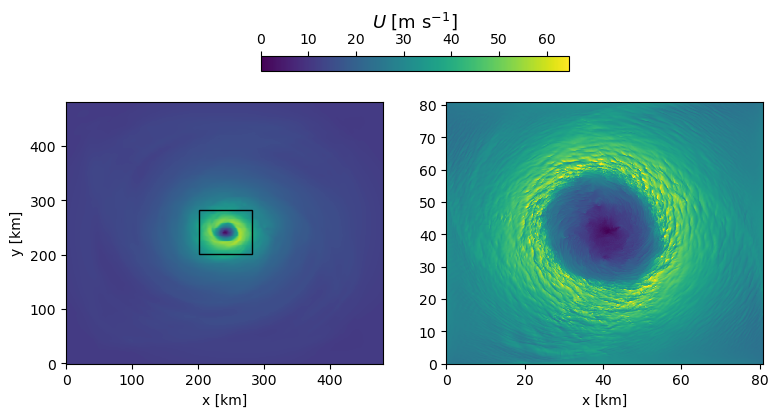

In [79]:
#%% Visualize domains
iz = 0

maxx = 0.75*np.max([np.max(uv_meso[iz,:,:]),np.max(uv_les[iz,:,:])])
minn = 0#np.min([np.min(uv_meso[iz,:,:]),np.min(uv_les[iz,:,:])])

fig, axs = plt.subplots(1,2,figsize=(9,4))
# Mesoscale domain
plt.subplot(1,2,1)
plt.pcolormesh(n_x_meso,n_y_meso,uv_meso[iz,:,:],vmin=minn,vmax=maxx)
plt.fill([n_x_meso[i_loc],n_x_meso[i_loc]+n_x_les[-1],n_x_meso[i_loc]+n_x_les[-1],n_x_meso[i_loc]],
         [n_y_meso[j_loc],n_y_meso[j_loc],n_y_meso[j_loc]+n_y_les[-1],n_y_meso[j_loc]+n_y_les[-1]],facecolor='none',edgecolor='black')
plt.xlabel("x [km]")
plt.ylabel("y [km]")
# LES domain
plt.subplot(1,2,2)
im1 = plt.pcolormesh(n_x_les,n_y_les,uv_les[iz,:,:],vmin=minn,vmax=maxx)
plt.xlabel("x [km]")

cbar = fig.colorbar(im1, ax=axs, orientation='horizontal',location='top', fraction=.05, pad = 0.1)
cbar.set_label(r'$U$ [m s$^{-1}$]',fontsize=13)
plt.savefig(dirFig + "domainLayout.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')

plt.show()
plt.close()
